In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [ ]:
x = data[:,:3]
y = data[:,3]

In [ ]:
print(x,"\n",y)

[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]] 
 [152. 185. 180. 196. 142. 101. 149. 115. 175. 164. 141. 141. 184. 152.
 148. 192. 147. 183. 177. 159. 177. 175. 175. 149. 192.]


In [ ]:
new_column = np.ones(25)
x = np.insert(x, 0, new_column, axis=1)
x

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [ ]:
print(x.shape,y.shape)

(25, 4) (25,)


Batch GD

In [ ]:
def batchgrad(x , y , LR , iters):
  m = len(y)
  loss = []
  thetas = []
  theta = np.zeros((x.shape[1]))
  hypos = []
  prev_cost = float('inf')

  for i in range(iters):
    print("**********iteration",i,"**********\n")
    thetas.append(theta) #same size this way
    h = np.dot(x, theta)
    hypos.append(h)
    print("h ", h,"\n")
    error_vec = h-y
    print("errorvec " ,error_vec,"\n")
    j = np.mean(error_vec**2) / 2
    loss.append(j)
    print("j ",j,"\n")
    gradvec = np.dot(x.T, error_vec) / m
    print("grad vector ", gradvec,"\n")
    gradvecNorm = np.linalg.norm(gradvec)
    print("grad vector norm ", gradvecNorm,"\n")

    if gradvecNorm < 0.01 or abs(prev_cost - j) < 0.001:
      break
    else:
      prev_cost = j
      theta = theta - LR * gradvec

  return thetas, loss, theta , h , hypos

In [ ]:
thetas , loss , theta , h ,hs= batchgrad(x, y, 0.0001, 1000)

Streaming output truncated to the last 5000 lines.
 143.55271925 142.20537568 187.11014151 154.63124918 150.34054938
 188.30112865 146.72117157 179.56686369 178.13539441 159.41407489
 175.13446016 174.16533622 166.7064423  152.85134084 191.27426546] 

errorvec  [ 1.17396557e+00  5.36712610e-03  1.76718361e+00  2.63761383e+00
 -1.23949654e+00  3.93025470e+00  4.43397953e-01 -3.18115365e+00
 -1.05975986e+00 -1.30679940e+00  2.55271925e+00  1.20537568e+00
  3.11014151e+00  2.63124918e+00  2.34054938e+00 -3.69887135e+00
 -2.78828435e-01 -3.43313631e+00  1.13539441e+00  4.14074891e-01
 -1.86553984e+00 -8.34663783e-01 -8.29355770e+00  3.85134084e+00
 -7.25734545e-01] 

j  3.7391684980212228 

grad vector  [ 0.05124346  2.45522985  1.62647407 -3.98315955] 

grad vector norm  4.953963811057852 

**********iteration 379 **********

h  [153.17289917 185.00525878 181.76637447 198.63793065 140.75972254
 104.93166245 149.44508616 111.82209235 173.94187381 162.69746564
 143.55346479 142.20708725 187

In [ ]:
from sklearn.metrics import r2_score
r2_score(h,y)

0.9872569631629421

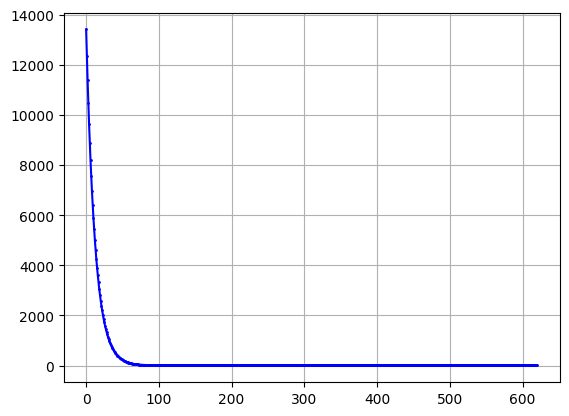

In [ ]:
i = list(range(len(loss)))
plt.plot(i, loss, color='blue', marker='o', markersize = 1)
plt.grid(True)
plt.show()

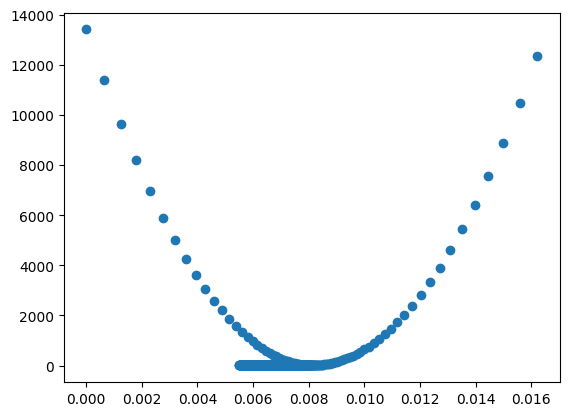

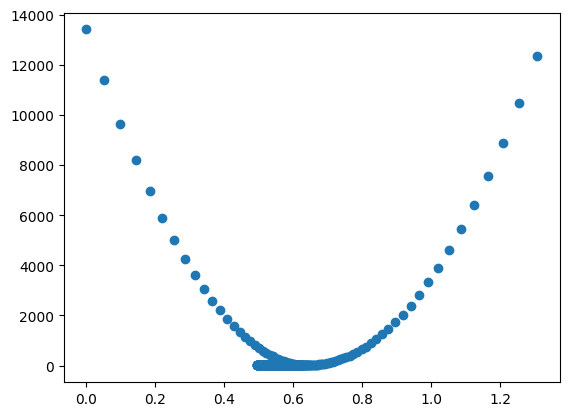

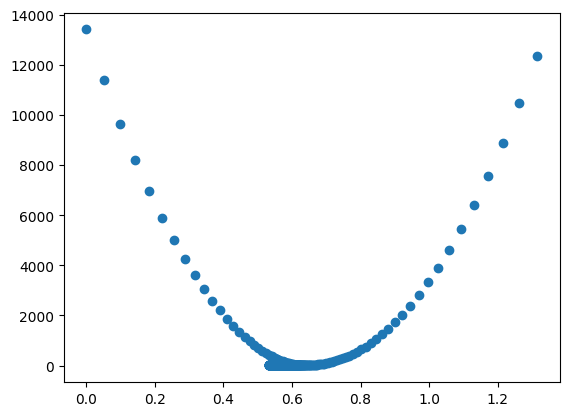

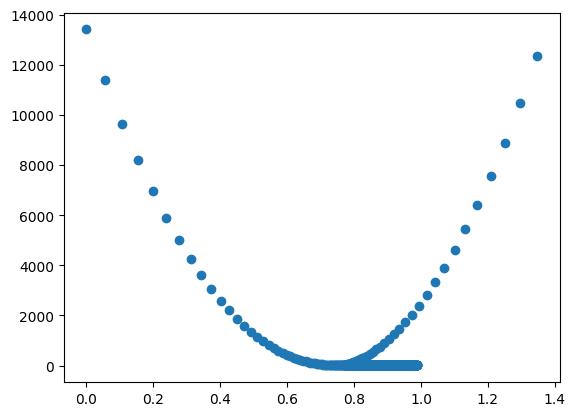

In [ ]:
for value in range(len(thetas[0])):
  theta = [arr[value] for arr in thetas]
  plt.scatter(theta,loss)
  plt.show()

Stochastic GD

In [ ]:
def stochgrad(x , y , LR , epochs):
  m = len(y)
  loss = []
  thetas = []
  theta = np.zeros((x.shape[1]))
  hypos = []

  for i in range(epochs):
    print("*******************************************************epoch",i,"**********************************************************************\n")
    for k in range(len(x)):
      print("**********iter",k,"****************************")
      thetas.append(theta)
      #h = theta0 + theta1*x[k]
      h = np.dot(x[k], theta)
      hypos.append(h)
      print("h ", h,"\n")
      error_vec = h-y[k]
      print("errorvec " ,error_vec,"\n")
      j = np.mean(error_vec**2) / 2
      loss.append(j)
      print("j ",j,"\n")
      #gradvec = np.array([d_theta0,d_theta1])
      gradvec = np.dot(x[k].T, error_vec) / m
      print("grad vector ", gradvec,"\n")
      gradvecNorm = np.linalg.norm(gradvec)
      print("grad vector norm ", gradvecNorm,"\n")
      theta = theta - LR * gradvec
      #print(len(loss))

    if gradvecNorm < 0.001 or (i != 0 and abs(loss[-25] - loss[-1]) < 0.001):        #if epoch n not = 0 to skip first one
      break

  return thetas, loss, theta , h , hypos

In [ ]:
thetas , loss , theta , h ,hs= stochgrad(x, y, 0.0001, 1000)

Streaming output truncated to the last 5000 lines.

grad vector norm  16.529226966458307 

**********iter 24 ****************************
h  191.48696381334912 

errorvec  -0.5130361866508792 

j  0.1316030644066379 

grad vector  [-0.02052145 -1.97005896 -1.90849461 -1.94953751] 

grad vector norm  3.3652045429466066 

*******************************************************epoch 982 **********************************************************************

**********iter 0 ****************************
h  153.33920671914552 

errorvec  1.3392067191455226 

j  0.8967373183022573 

grad vector  [0.05356827 3.91048362 4.2854615  4.01762016] 

grad vector norm  7.0569967910743845 

**********iter 1 ****************************
h  185.41079847406587 

errorvec  0.4107984740658708 

j  0.08437769314742395 

grad vector  [0.01643194 1.52817032 1.44601063 1.52817032] 

grad vector norm  2.6003510959812717 

**********iter 2 ****************************
h  181.92441369493903 

errorvec  1.92441369

In [ ]:
yhat = np.dot(x, theta)

In [ ]:
from sklearn.metrics import r2_score
r2_score(yhat,y)

0.9875366491272689

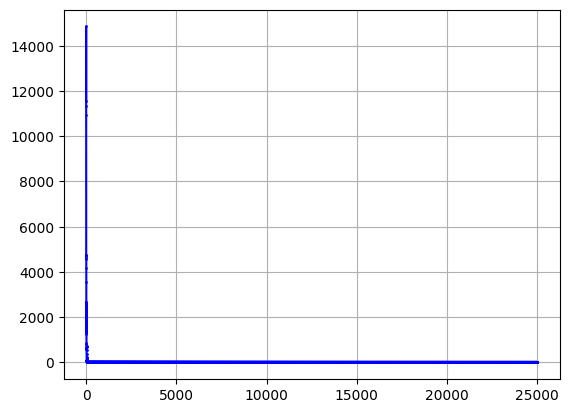

In [ ]:
i = list(range(len(loss)))
plt.plot(i, loss, color='blue', marker='o', markersize = 1)
plt.grid(True)
plt.show()  #loss in each iteration not epoch

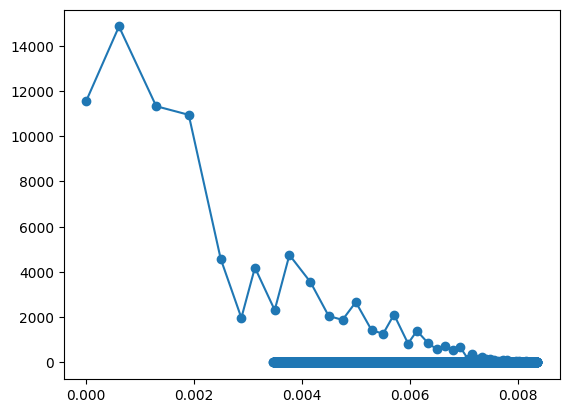

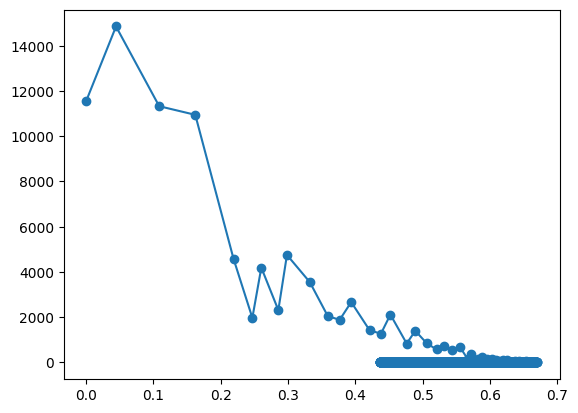

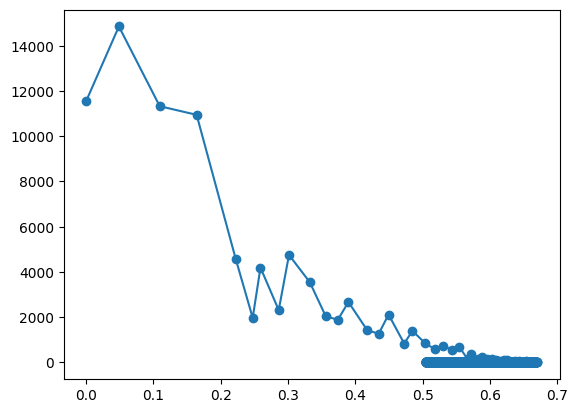

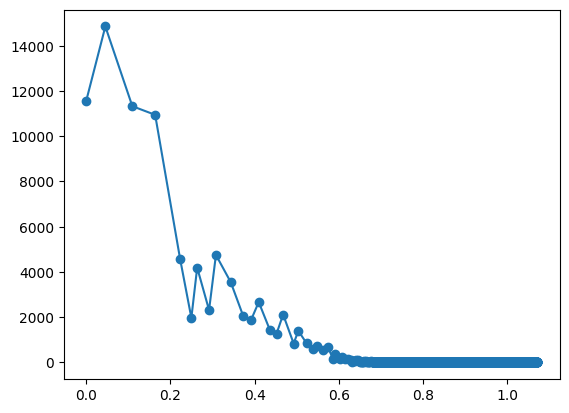

In [ ]:
for value in range(len(thetas[0])):
  theta = [arr[value] for arr in thetas]
  plt.plot(theta, loss, marker='o', linestyle='-')
  plt.show()

Minibatch GD

In [ ]:
def minibatchgrad(x, y, batch_size , LR, epochs):
  m = len(y)
  loss = []
  thetas = []
  theta = np.zeros((x.shape[1]))
  hypos = []
  num_batches = len(x) // batch_size

  for i in range(epochs):
    print("*******************************************************epoch",i,"**********************************************************************\n")
    for k in range(0, m, batch_size):
      print("-----batch-----\n")
      x_batch = x[k:k + batch_size]
      y_batch = y[k:k + batch_size]
      thetas.append(theta)
      h = np.dot(x_batch, theta)
      hypos.append(h)
      print("h ", h,"\n")
      error_vec = h-y_batch
      print("errorvec " ,error_vec,"\n")
      j = np.mean(error_vec**2) / 2
      loss.append(j)
      print("j ",j,"\n")
      gradvec = np.dot(x_batch.T, error_vec) / m
      print("grad vector ", gradvec,"\n")
      gradvecNorm = np.linalg.norm(gradvec)
      print("grad vector norm ", gradvecNorm,"\n")
      theta = theta - LR * gradvec

    if gradvecNorm < 0.001 or (i != 0 and abs(loss[-1] - loss[ - (num_batches+1)]) < 0.001):
        break

  return thetas, loss, theta , h , hypos

In [ ]:
thetas , loss , theta , h ,hs= minibatchgrad(x, y, 5, 0.0001, 1000)

Streaming output truncated to the last 5000 lines.
grad vector  [0.1094144  5.99341384 4.58621829 5.59332977] 

grad vector norm  9.394238501842354 

-----batch-----

h  [143.74349779 142.57277528 186.40974526 153.5104113  150.97515052] 

errorvec  [2.74349779 1.57277528 2.40974526 1.5104113  2.97515052] 

j  2.6940137291272626 

grad vector  [ 0.44846321 34.04339819 34.44879718 35.13077171] 

grad vector norm  59.83347580685932 

-----batch-----

h  [187.45620082 144.45391807 179.57108781 176.47665063 157.99007604] 

errorvec  [-4.54379918 -2.54608193 -3.42891219 -0.52334937 -1.00992396] 

j  4.017992393283582 

grad vector  [ -0.48208267 -40.9495366  -41.43712798 -42.03997267] 

grad vector norm  71.84352322299914 

-----batch-----

h  [175.86846657 174.48790862 167.2914291  151.84870769 191.03611327] 

errorvec  [-1.13153343 -0.51209138 -7.7085709   2.84870769 -0.96388673] 

j  7.000888401182533 

grad vector  [ -0.29869499 -24.56501891 -25.29253926 -27.6781465 ] 

grad vector norm 

In [ ]:
yhat = np.dot(x, theta)

In [ ]:
from sklearn.metrics import r2_score
r2_score(yhat,y)

0.9870420750143887

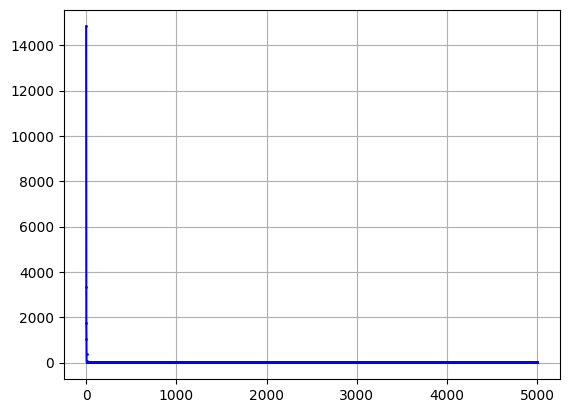

In [ ]:
i = list(range(len(loss)))
plt.plot(i, loss, color='blue', marker='o', markersize = 1)
plt.grid(True)
plt.show()  #loss in each iteration not epoch

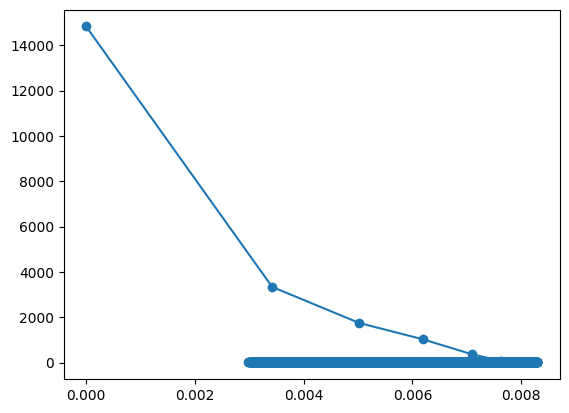

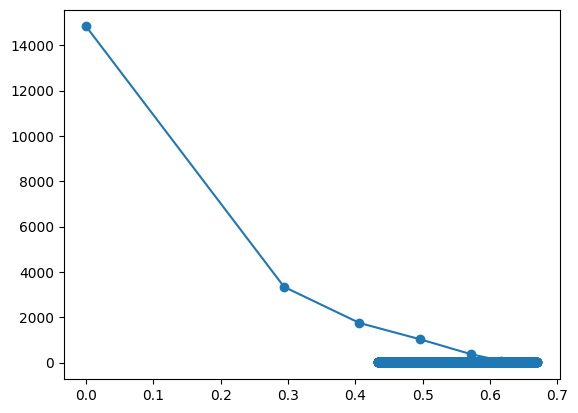

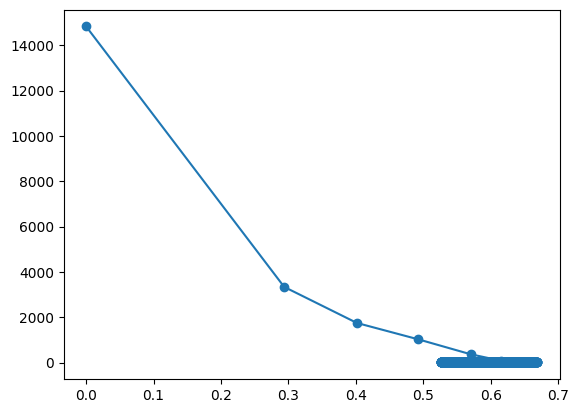

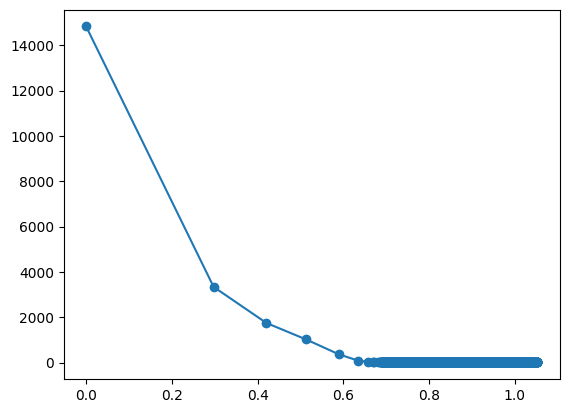

In [ ]:
for value in range(len(thetas[0])):
  theta = [arr[value] for arr in thetas]
  plt.plot(theta, loss, marker='o', linestyle='-')
  plt.show()